In [49]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import  linear_model
from sklearn.model_selection import cross_validate

##Load data


In [50]:
# from google.colab import files
# data_to_load = files.upload()

# import io
# train = pd.read_csv(io.BytesIO(data_to_load['clean_train.csv']))

train = pd.read_csv('clean_train.csv')

if 'state' in list(train.columns):
  del train['state']

np.random.seed(8)


#Part 1: KNN Classifier

In [51]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial import distance
from scipy.stats import mode

class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 5):
    self.n_neighbors = n_neighbors
  
  def fit(self, X, y):
    self.X = np.copy(X)
    self.y = np.copy(y)
    return self
 
  def predict(self, X):
    dists = distance.cdist(self.X, X, 'euclidean')
    idxs = np.argpartition(dists, self.n_neighbors, axis=0)[:self.n_neighbors]
    nearest = np.take(self.y, idxs)
    predictions = mode(nearest, axis=0)[0]
    return predictions[0]


##Q1 - check knn classifier

In [52]:
def visualize_clf(clf, X, Y, title, marker_size=250):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["P", "v"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())
    plot_step = 0.02

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(range(n_classes), palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

In [53]:
X_toy, y_toy = make_classification(n_samples=100, n_features=2,
random_state=8, flip_y = 0.1,
 n_informative=2, n_redundant=0)

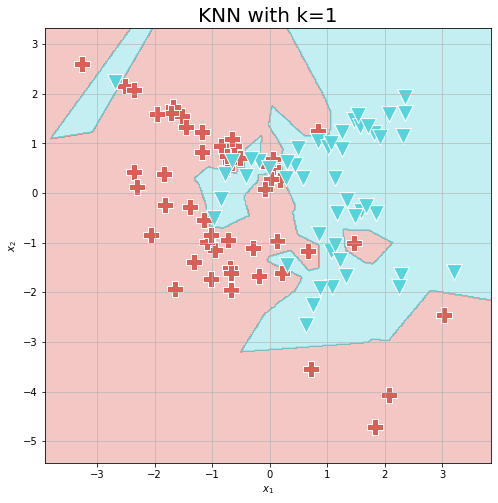

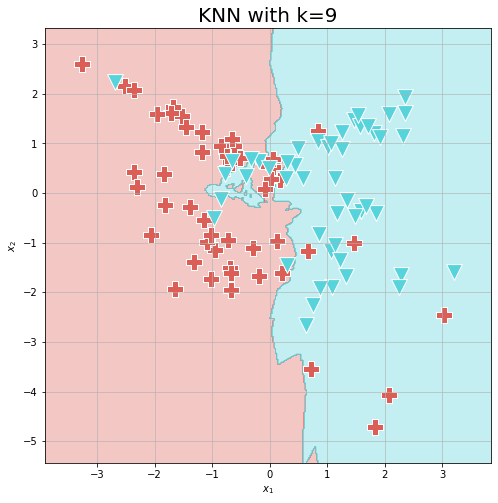

In [54]:
clf1 = kNN(n_neighbors=1)
clf1.fit(X_toy, y_toy)

visualize_clf(clf1, X_toy, y_toy, 'KNN with k=1')

clf9 = kNN(n_neighbors=9)
clf9.fit(X_toy, y_toy)
visualize_clf(clf9, X_toy, y_toy, 'KNN with k=9')

##Q2

In [55]:
s = train.corr().spread.abs()
s.sort_values(kind="quicksort", ascending=False)

spread                           1.000000
PCR_10                           0.221413
PCR_07                           0.053665
PCR_08                           0.041848
household_income                 0.036947
blood_type_A+                    0.035416
blood_type_O+                    0.034534
shortness_of_breath              0.033380
cough                            0.030875
low_appetite                     0.030061
sex_F                            0.029619
current_location_x_coordinate    0.029112
Unnamed: 0                       0.026326
headache                         0.024135
PCR_05                           0.020714
PCR_03                           0.016699
current_location_y_coordinate    0.016215
PCR_02                           0.015376
PCR_04                           0.015112
fever                            0.012337
blood_type_B+                    0.011228
PCR_01                           0.011058
blood_type_A-                    0.010451
sugar_levels                     0

##Q3 - 3d scatter plot 


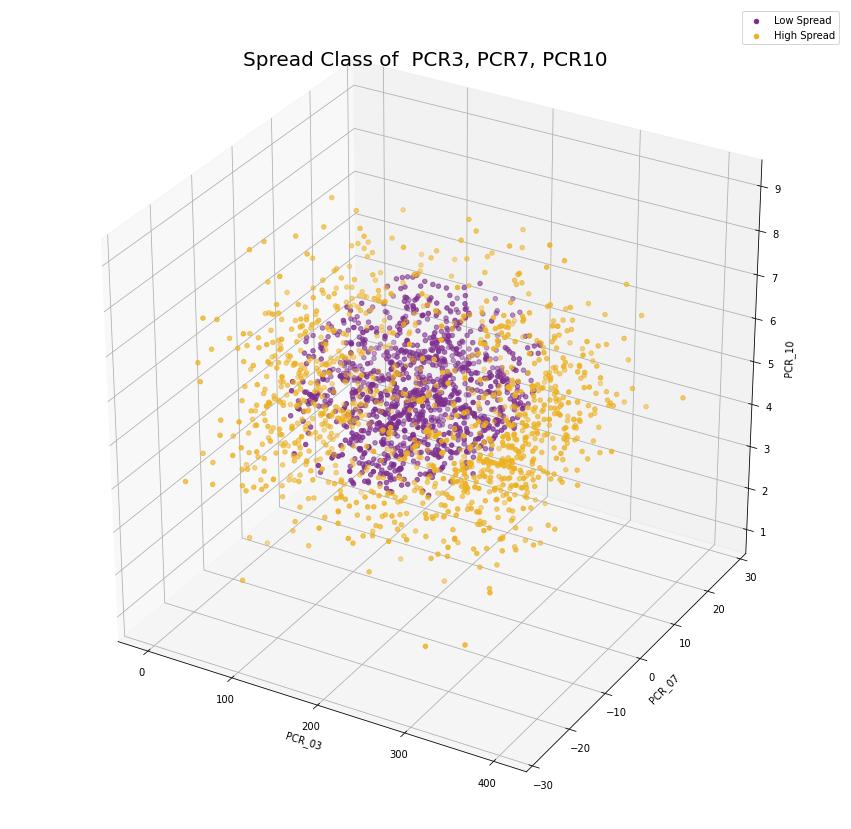

In [56]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

xs_high = train[train['spread']==1]['PCR_03']
ys_high = train[train['spread']==1]['PCR_07']
zs_high = train[train['spread']==1]['PCR_10']
high = ax.scatter(xs_high, ys_high, zs_high, c='#EDB120')

xs_low = train[train['spread']==-1]['PCR_03']
ys_low = train[train['spread']==-1]['PCR_07']
zs_low = train[train['spread']==-1]['PCR_10']
low = ax.scatter(xs_low, ys_low, zs_low, c='#7E2F8E')

ax.set_xlabel('PCR_03')
ax.set_ylabel('PCR_07')
ax.set_zlabel('PCR_10')
ax.set_title('Spread Class of  PCR3, PCR7, PCR10', size=20)

ax.legend((low, high), ('Low Spread', 'High Spread'), loc='upper right')
plt.show()

##Q5 - train knn with pcr03, pcr07, pcr10

In [57]:
temp_train = train[['PCR_03', 'PCR_07', 'PCR_10']]
temp_train_labels = train['spread']

temp_knn_clf = kNN(n_neighbors=11)
temp_knn_clf.fit(temp_train.to_numpy(), temp_train_labels.to_numpy())
temp_knn_clf.score(temp_train.to_numpy(), temp_train_labels.to_numpy())



0.8145833333333333

##Q7

In [58]:
print(temp_train)
scaler = MinMaxScaler()
#scaler = StandardScaler()
normalized_temp_train = temp_train
scaler.fit(normalized_temp_train)
normalized_temp_train = scaler.transform(normalized_temp_train)

#print(normalized_temp_train)

temp_knn_clf = kNN(n_neighbors=11)
temp_knn_clf.fit(normalized_temp_train, temp_train_labels.to_numpy())
temp_knn_clf.score(normalized_temp_train, temp_train_labels.to_numpy())




          PCR_03     PCR_07    PCR_10
0     237.883097  -1.452510  5.000000
1      76.931907   2.889464  7.000000
2      90.836409  -0.721322  4.000000
3     300.256742   1.221269  7.000000
4     257.037443  -0.616371  4.000000
...          ...        ...       ...
2395  166.283266 -19.671944  5.000000
2396  179.332135  -2.753871  4.938721
2397  328.937940   8.102726  6.000000
2398  205.519096   2.463036  5.000000
2399  137.499871  -9.961695  6.000000

[2400 rows x 3 columns]


0.92375

##Q8 - helper

In [59]:
# ALL_COLS_NAMES = train.columns.to_list()

# CONTINUOUS_AND_ORDINAL = [
#                          'sugar_levels', 'days_since_pcr',
#                           'PCR_03','PCR_07', 'PCR_10']
# COLS = 3
# ROWS = int(np.ceil(len(ALL_COLS_NAMES) / COLS))

# TARGET_FEATURES = ['covid', 'risk', 'spread']

# for feature in TARGET_FEATURES:
#   plt.figure(figsize=(15, 5 * ROWS))
#   for i, column in enumerate(CONTINUOUS_AND_ORDINAL, 1):
#     plt.subplot(ROWS,COLS,i)
#     sns.histplot(data=train, x=column, hue=feature, kde=True)
#     plt.grid(alpha=0.5)
#     plt.tight_layout()

#   plt.figure(figsize=(15, 5 * ROWS))
#   for i, column in enumerate(ALL_COLS_NAMES, 1):
#     if column in CONTINUOUS_AND_ORDINAL:
#       continue
#     plt.subplot(ROWS,COLS,i)
#     sns.histplot(data=train, x=column, hue=feature, kde=False)
#     plt.grid(alpha=0.5)
#     plt.tight_layout()

In [60]:
def accuracy(feature,label, scaler):
  normalized = train[[feature]]
  scaler.fit(normalized)
  normalized = scaler.transform(normalized)
  temp_knn_clf = kNN(n_neighbors=11)
  temp_knn_clf.fit(normalized, train[label].to_numpy())
  score = temp_knn_clf.score(normalized, train[label].to_numpy())
  return score

print(accuracy('days_since_pcr','covid', StandardScaler()))
print(accuracy('days_since_pcr','covid', MinMaxScaler()))
def feature_and_better_scaler():
  feature_and_scaler = {}
  feature_and_max_accuracy = {}
  labels_arr = ['spread', 'covid', 'risk']
  scalers = [MinMaxScaler() , StandardScaler()]
  for feature in train:
    if feature == 'state':
      continue
    feature_and_max_accuracy[feature] = 0
    for label in labels_arr:
      for scaler in scalers:
        accuracy_now = accuracy(feature,label, scaler)
        if accuracy_now > feature_and_max_accuracy[feature]:
          feature_and_scaler[feature] = scaler
          feature_and_max_accuracy[feature] = max(feature_and_max_accuracy[feature], accuracy_now)
  return feature_and_scaler

#print(feature_and_better_scaler())

#feature_and_scaler = feature_and_better_scaler()
feature_and_scaler ={ 'age': MinMaxScaler(), 'num_of_siblings': MinMaxScaler(), 
                     'household_income': MinMaxScaler(), 'conversations_per_day': StandardScaler(), 
                     'sugar_levels': StandardScaler(), 'PCR_01': StandardScaler(), 'PCR_02': StandardScaler(), 
                     'PCR_03': StandardScaler(), 'PCR_04': StandardScaler(), 'PCR_05': StandardScaler(), 
                     'PCR_07': StandardScaler(), 'PCR_08': StandardScaler(), 'PCR_10': StandardScaler(), 
                     'blood_type_A+': MinMaxScaler(), 'blood_type_A-': MinMaxScaler(), 'blood_type_AB+': MinMaxScaler(), 
                     'blood_type_AB-': MinMaxScaler(), 'blood_type_B+': MinMaxScaler(), 'blood_type_B-': MinMaxScaler(), 
                     'blood_type_O+': MinMaxScaler(), 'blood_type_O-': MinMaxScaler(), 'cough': MinMaxScaler(), 
                     'fever': MinMaxScaler(), 'headache': MinMaxScaler(), 'low_appetite': MinMaxScaler(), 
                     'shortness_of_breath': MinMaxScaler(), 'sex_F': MinMaxScaler(), 'current_location_x_coordinate': MinMaxScaler(), 
                     'current_location_y_coordinate': MinMaxScaler(), 'days_since_pcr': StandardScaler()}
def normalization_of_features():
  for feature in feature_and_scaler:
    if feature == 'state':
      continue
    # train[feature] = train[[feature]]
    (feature_and_scaler[feature]).fit(train[[feature]])
    train[feature] = (feature_and_scaler[feature]).transform(train[[feature]])

normalization_of_features()
print(train)




0.6154166666666666
0.6154166666666666
      Unnamed: 0  patient_id  ...  current_location_y_coordinate  days_since_pcr
0           2758        4126  ...                       0.525443   -3.634985e-16
1           2388        6904  ...                       0.480022    5.948393e-02
2            137       14355  ...                       0.481864    9.739307e-01
3            506       11696  ...                       0.247308    3.536416e-01
4           2712        5167  ...                       0.465575    9.785232e-02
...          ...         ...  ...                            ...             ...
2395        2181       12616  ...                       0.241644    1.568641e+00
2396        2409         397  ...                       0.253146   -1.091568e+00
2397        2033       13268  ...                       0.470814   -6.631208e-01
2398        1364       10774  ...                       0.493627    7.181414e-01
2399         451        7620  ...                       0.772931    6.6

In [61]:
train['PCR_03'][0]

0.6905445171463113

In [62]:
# ALL_COLS_NAMES = train.columns.to_list()

# CONTINUOUS_AND_ORDINAL = [
#                          'sugar_levels', 'household_income']
#                           # 'PCR_03','PCR_07', 'PCR_10']
# COLS = 3
# ROWS = int(np.ceil(len(ALL_COLS_NAMES) / COLS))

# TARGET_FEATURES = ['covid', 'risk', 'spread']

# for feature in TARGET_FEATURES:
#   plt.figure(figsize=(15, 5 * ROWS))
#   for i, column in enumerate(CONTINUOUS_AND_ORDINAL, 1):
#     plt.subplot(ROWS,COLS,i)
#     sns.histplot(data=train, x=column, hue=feature, kde=True)
#     plt.grid(alpha=0.5)
#     plt.tight_layout()

#   plt.figure(figsize=(15, 5 * ROWS))
#   for i, column in enumerate(ALL_COLS_NAMES, 1):
#     if column in CONTINUOUS_AND_ORDINAL:
#       continue
#     plt.subplot(ROWS,COLS,i)
#     sns.histplot(data=train, x=column, hue=feature, kde=False)
#     plt.grid(alpha=0.5)
#     plt.tight_layout()

##Q9

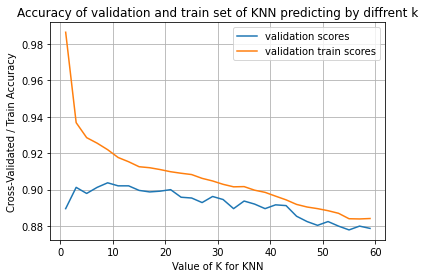

0.90375 9
0.921904761904762


In [63]:

max_k = 0
max_accuracy = 0
k_range = range(1, 61, 2)
k_scores_test = []
k_scores_train = []
temp_train = train[['PCR_03', 'PCR_07', 'PCR_10']]
temp_train_labels = train['spread']
for k in k_range:
  estimator = kNN(k) 
  cv_results = cross_validate(estimator, temp_train, temp_train_labels, cv=8, return_train_score=False)
  mean_of_accuracy = (cv_results['test_score']).mean()
  k_scores_test.append(mean_of_accuracy)

  if(mean_of_accuracy  > max_accuracy):
    max_accuracy = mean_of_accuracy
    max_k = k

  cv_results = cross_validate(estimator, temp_train, temp_train_labels, cv=8, return_train_score=True)
  mean_of_accuracy = (cv_results['train_score']).mean()
  k_scores_train.append(mean_of_accuracy)
  if max_k == k:
    train_accuracy = mean_of_accuracy



# plot to see clearly
plt.plot(k_range, k_scores_test, label='validation scores')
plt.plot(k_range, k_scores_train, label='validation train scores')
plt.legend()
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated / Train Accuracy')
plt.title("Accuracy of validation and train set of KNN predicting by diffrent k")
plt.grid()
plt.show()

print(max_accuracy, max_k)    
print(train_accuracy)

##Q10

In [64]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(kNN(11), temp_train, temp_train_labels, cv=8)

confusion_matrix(temp_train_labels, y_pred)

array([[1112,   73],
       [ 162, 1053]])

##Q12

In [65]:
s = train.corr().risk.abs()
s.sort_values(kind="quicksort", ascending=False)

risk                             1.000000
sugar_levels                     0.261502
PCR_05                           0.191135
age                              0.091490
low_appetite                     0.041355
current_location_x_coordinate    0.034988
fever                            0.034864
PCR_07                           0.033344
PCR_08                           0.029387
PCR_03                           0.028368
sex_F                            0.023396
PCR_01                           0.021887
headache                         0.018280
PCR_04                           0.017572
covid                            0.016274
PCR_10                           0.015346
blood_type_A-                    0.015341
blood_type_B-                    0.014656
blood_type_A+                    0.014556
blood_type_O+                    0.010651
shortness_of_breath              0.010646
num_of_siblings                  0.010051
PCR_02                           0.009714
blood_type_AB-                   0

#Part 2: Decision Trees

##Q13:


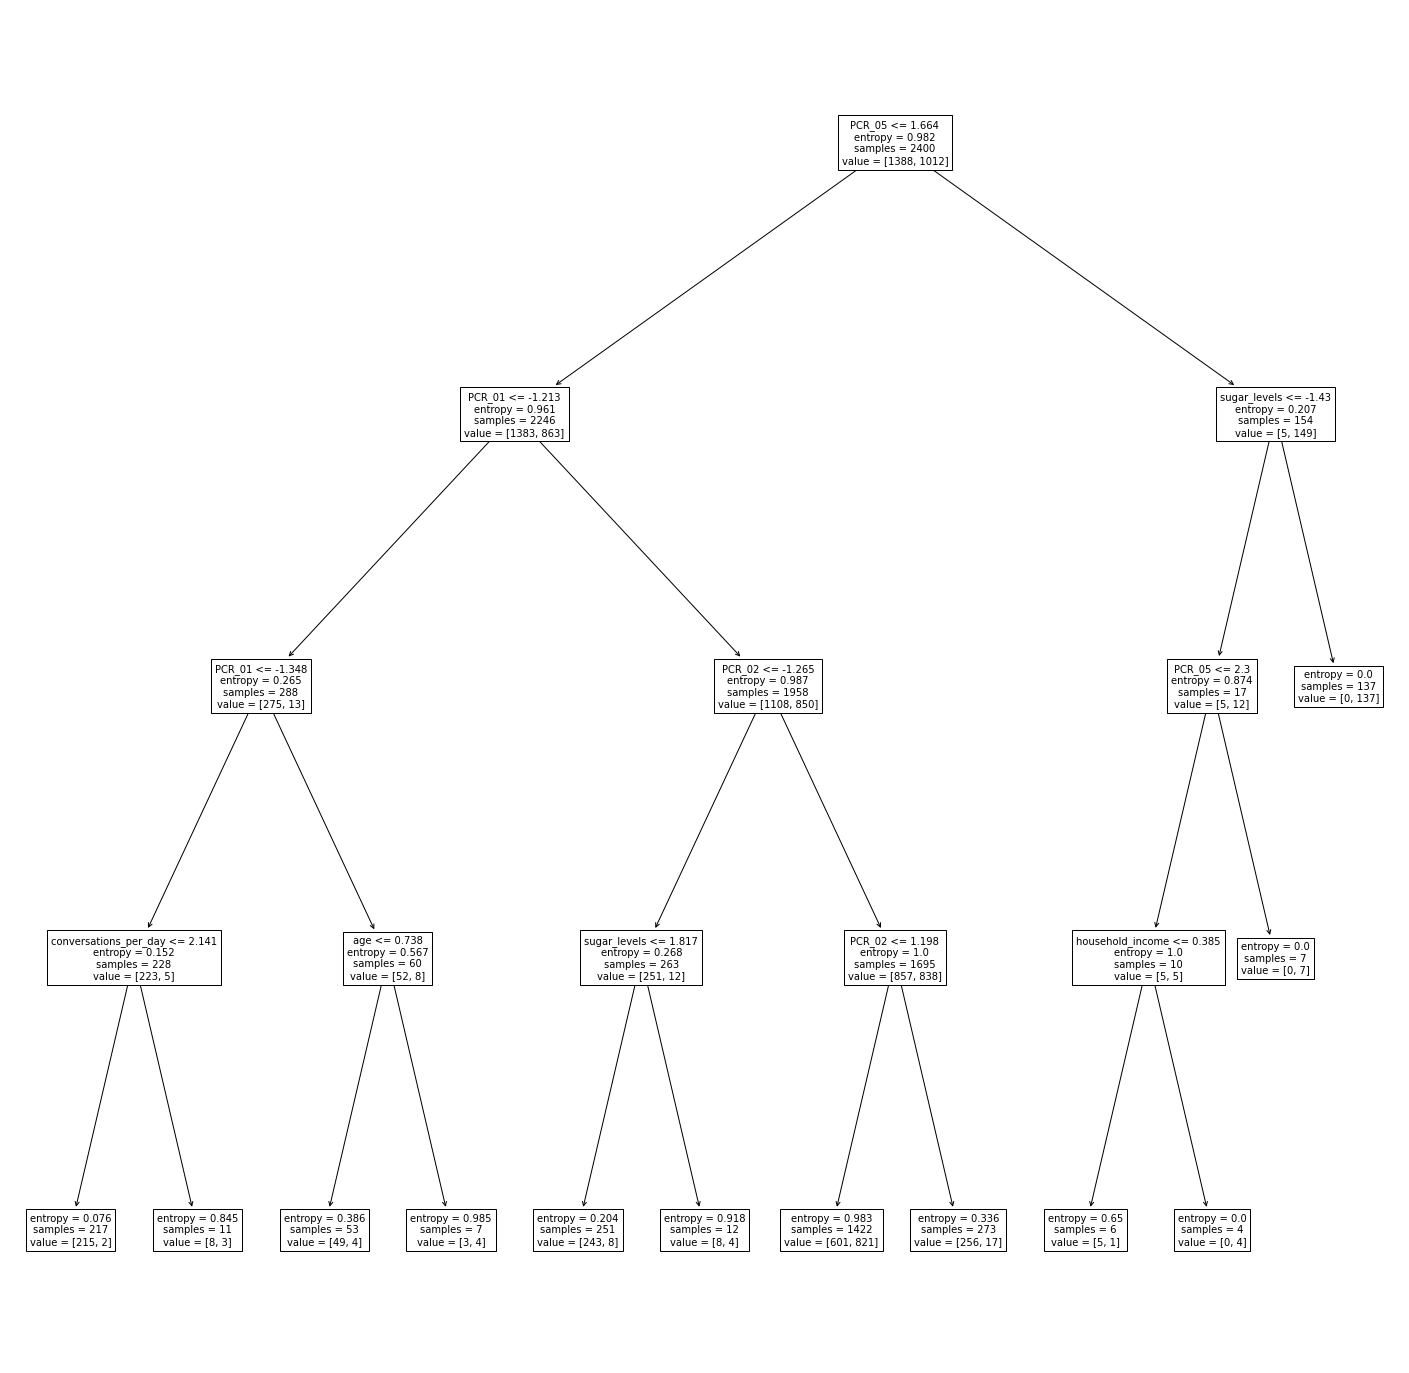

0.7795833333333333


In [66]:
from sklearn.datasets import load_iris
from sklearn import tree

features = ['age','num_of_siblings','household_income','conversations_per_day','sugar_levels','PCR_01','PCR_02','PCR_03','PCR_04','PCR_05','PCR_07','PCR_08',
 'PCR_10',
 'blood_type_A+','blood_type_A-','blood_type_AB+','blood_type_AB-','blood_type_B+','blood_type_B-','blood_type_O+','blood_type_O-',
 'cough','fever','headache','low_appetite','shortness_of_breath','sex_F','current_location_x_coordinate','current_location_y_coordinate','days_since_pcr']
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4, criterion="entropy")
X = train[features]
y = train['risk']
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(25,25))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names=features)
plt.show()


estimator = clf
cv_results = cross_validate(estimator, temp_train, temp_train_labels, cv=8)
mean_of_accuracy = (cv_results['test_score']).mean()
print(mean_of_accuracy)

##Q15:

In [67]:
from sklearn.model_selection import GridSearchCV

decision_tree = tree.DecisionTreeClassifier(random_state=0)
X = train[features]
y = train['risk']
decision_tree = decision_tree.fit(X, y)
param_dict = {"min_samples_leaf":range(1,50,2) , "max_depth":range(1,50,2)}
grid = GridSearchCV(decision_tree, param_grid = param_dict, cv = 8)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 11, 'min_samples_leaf': 13}
0.8933333333333333


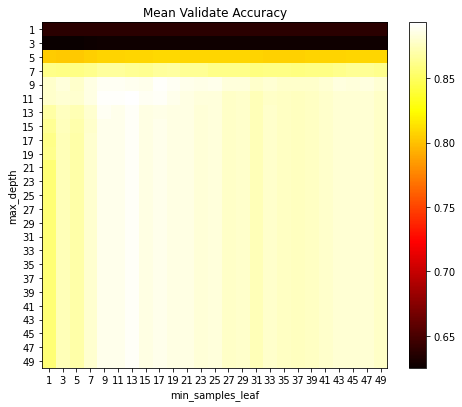

In [68]:
scores = grid.cv_results_['mean_test_score'].reshape(25,25)
# print(scores)
min_samples_leaf = range(1,50,2)
max_depth = range(1,50,2)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(min_samples_leaf)), min_samples_leaf)
plt.yticks(np.arange(len(max_depth)), max_depth)
plt.title('Mean Validate Accuracy')
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

decision_tree = tree.DecisionTreeClassifier(random_state=0)
X = train[features]
y = train['risk']
decision_tree = decision_tree.fit(X, y)
param_dict = {"min_samples_leaf":range(1,50,2) , "max_depth":range(1,50,2)}
grid = GridSearchCV(decision_tree, param_grid = param_dict, cv = 8, return_train_score=True)
grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 11, 'min_samples_leaf': 13}
0.8933333333333333


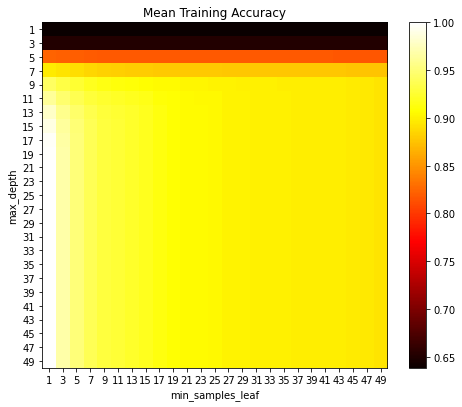

In [70]:
scores = grid.cv_results_['mean_train_score'].reshape(25,25)
# print(scores)
min_samples_leaf = range(1,50,2)
max_depth = range(1,50,2)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(min_samples_leaf)), min_samples_leaf)
plt.yticks(np.arange(len(max_depth)), max_depth)
plt.title('Mean Training Accuracy')
plt.show()

#Part 3: SVM

In [71]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        

        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w.T) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        loss = 0.0
        
        max_arr = np.maximum(0, 1 - hinge_inputs)
        summation = np.sum(max_arr)
        
        regularized_sum = C*summation

        loss = norm*norm + regularized_sum
        return loss 



    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        g_w = None
        g_b = 0.0

        margins = (X.dot(w.T) + b).reshape(-1,1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))
        f_hinge_inputs = np.less(hinge_inputs,1)*(-1)

        g_w = 2 * w + C * np.matrix(np.multiply(np.multiply(f_hinge_inputs, X), y.reshape(-1,1))).sum(axis=0)
        
        g_b = C * np.sum(np.multiply(f_hinge_inputs, y.reshape(-1,1)))

        return g_w, g_b



    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))
        

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]
            
            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr*g_w
            self.b = self.b - self.lr*g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies



    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
        """
        # TODO: compute the predicted labels (+1 or -1)
        margins = (X.dot(self.w.T)+self.b).reshape(-1,1)
        y_pred = np.sign(margins)  + (margins==0) # to get 1 for margin with val 0
        
        return y_pred


In [72]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b



def compare_gradients(X, y, deltas, C=1, REPEATS=100, figsize=(10, 6)):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.figure(figsize=figsize)
    plt.title('Residuals of analytical and numerical gradients', fontsize=22)
    plt.plot(deltas, residual_means, linewidth=3)      
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel('dist(analytic, numeric$_\delta$)', fontsize=18)
    plt.ylabel(r'$\left\Vert \nabla_{w}p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)

    plt.grid(alpha=0.5)
    plt.show()


##Q16

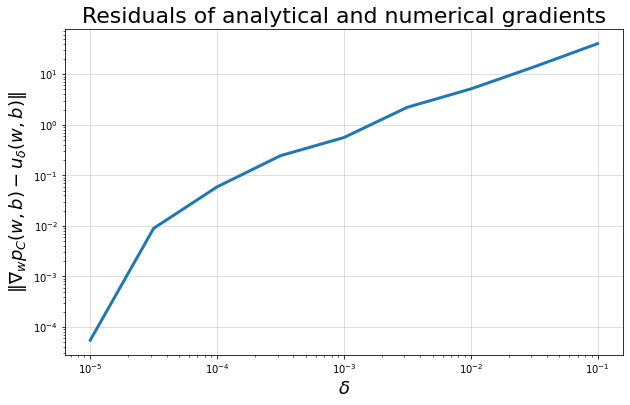

In [90]:
y_train = train[['covid']]
X_train = train.drop(['covid', 'spread', 'risk','patient_id', 'Unnamed: 0'], axis=1)
compare_gradients(X_train.to_numpy(), y_train.to_numpy(), deltas=np.logspace(-5, -1, 9))

##Q17

In [74]:
clf = SoftSVM(C=1e2, lr=1e-5)
losses, accuracies = clf.fit_with_logs(X_train.to_numpy(), y_train.to_numpy(), max_iter=5000)

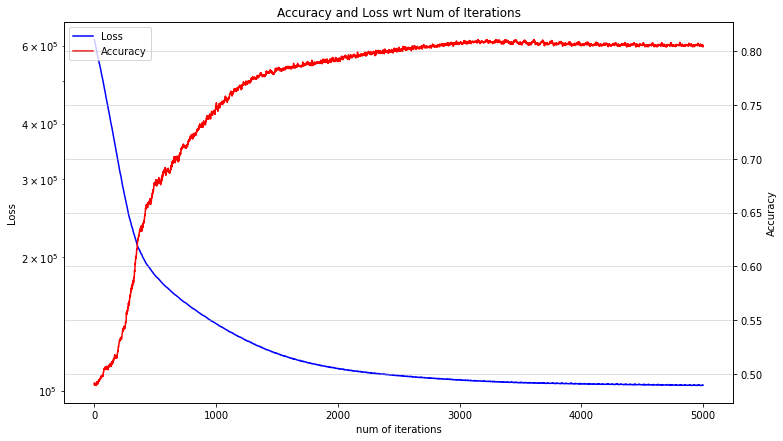

In [75]:
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(111)
line1 = ax1.semilogy(losses, c='b', label='Loss')
ax2 = ax1.twinx()
line2 = ax2.plot(accuracies, c='r', label='Accuracy')
ax2.grid(alpha=0.5)
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax1.set_xlabel('num of iterations')
plt.title('Accuracy and Loss wrt Num of Iterations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [76]:
print(max(accuracies))

0.8108333333333333


##Q19

In [77]:
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures

In [78]:
ks = []
train_result_means = []
test_result_means = []

y_train = train['spread']
X_train2 = train[['PCR_03','PCR_07','PCR_10']]
poly = PolynomialFeatures(2)
X_train3 = poly.fit_transform(X_train2)

In [79]:
for k in np.logspace(-10, -1, 10):
  clf = SoftSVM(C=1000, lr=k)
  clf.fit(X_train3, np.array(y_train), max_iter=2000)
  scores = cross_validate(clf, X_train3, np.array(y_train), cv=8, return_train_score=True)
  ks.append(k)
  train_result_means.append(scores['train_score'].mean())
  test_result_means.append(scores['test_score'].mean())

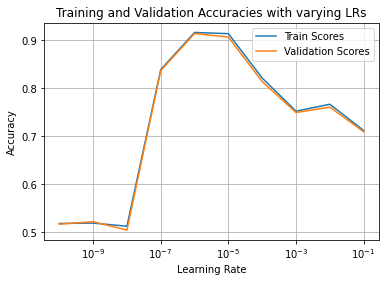

In [80]:
fig, ax = plt.subplots()
ax.plot(ks, train_result_means, label = 'Train Scores')
ax.plot(ks, test_result_means, label = 'Validation Scores')
plt.legend()
plt.title('Training and Validation Accuracies with varying LRs')
ax.set_xscale('log')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Accuracy')
plt.grid()
plt.show()